In [162]:
#Importar librerias
import pandas as pd
import geopandas as gpd
import numpy as np 
from datetime import datetime, date
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import holidays
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale, OneHotEncoder
from sklearn.cluster import KMeans

In [163]:
#Establecer estilo de los graficos
sns.set(style="darkgrid", palette="Set2",)

# Ignorar advertencias de tipo FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

<center> 

# 1. Preprocesamiento de los datos </center>

<center>

## 1.1 Vistazo inicial del dataset
</center>

In [164]:
#Importacion del dataset
df = pd.read_csv('incidentes_viales.csv', sep=';', encoding='utf-8')
df.head()

C:\Users\dgilr\AppData\Local\Temp\ipykernel_14392\2719112179.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('incidentes_viales.csv', sep=';', encoding='utf-8')


,AÑO,CBML,CLASE_ACCIDENTE,DIRECCION,DIRECCION ENCASILLADA,DISEÑO,EXPEDIENTE,FECHA_ACCIDENTE,FECHA_ACCIDENTES,GRAVEDAD_ACCIDENTE,MES,NRO_RADICADO,NUMCOMUNA,BARRIO,COMUNA,LOCATION,X,Y
0,2015,1013,Caida Ocupante,CR 46 CL 43,CR 046 043 000 00000,Tramo de via,A000259731,21/10/2015 05:58:00,2015-10-21T10:58:00.000Z,Con heridos,10,1508668,10,Barrio Colón,La Candelaria,"[-75.5688011014, 6.24312304123]",834949.69,1182357.34
1,2015,1020,Choque,CR 43 A CL 29,CR 043 A 029 000 00000,Tramo de via,A000261725,05/11/2015 03:00:00,2015-11-05T08:00:00.000Z,Solo daños,11,1510621,10,San Diego,La Candelaria,"[-75.5693883283, 6.22870030622]",834880.17,1180762.02
2,2015,0205,Otro,CR 46 CL 37,CR 046 037 000 00000,Tramo de via,A000259739,21/10/2015 07:40:00,2015-10-21T12:40:00.000Z,Con heridos,10,1508691,02,La Francia,Santa Cruz,"[-75.5503911403, 6.29869502502]",837004.94,1188499.17
3,2015,0101,Atropello,CR 34 CL 112,CR 034 112 000 00000,Tramo de via,A000259752,21/10/2015 12:00:00,2015-10-21T17:00:00.000Z,Con heridos,10,1508694,01,Santo Domingo Savio No. 1,Popular,"[-75.5442195069, 6.30019383306]",837688.53,1188663.05
4,2015,1504,Choque,CR 50 CL 14,CR 050 014 000 00000,Tramo de via,A000259949,03/11/2015 06:16:00,2015-11-03T11:16:00.000Z,Solo daños,11,1510634,15,Santa Fé,Guayabal,"[-75.578180998, 6.21699243701]",833903.11,1179469.60


In [165]:
#Tamaño del dataset
df.shape

(270765, 18)

In [166]:
#Verificar el tipo de datos por variable
df.dtypes

AÑO                       object
CBML                      object
CLASE_ACCIDENTE           object
DIRECCION                 object
DIRECCION ENCASILLADA     object
DISEÑO                    object
EXPEDIENTE                object
FECHA_ACCIDENTE           object
FECHA_ACCIDENTES          object
GRAVEDAD_ACCIDENTE        object
MES                        int64
NRO_RADICADO              object
NUMCOMUNA                 object
BARRIO                    object
COMUNA                    object
LOCATION                  object
X                        float64
Y                        float64
dtype: object

In [167]:
#Verificar si hay valores nulos y cuantos hay por variable
df.isnull().sum()

AÑO                          0
CBML                     18156
CLASE_ACCIDENTE              6
DIRECCION                    0
DIRECCION ENCASILLADA      391
DISEÑO                    1148
EXPEDIENTE                 110
FECHA_ACCIDENTE              0
FECHA_ACCIDENTES             0
GRAVEDAD_ACCIDENTE           0
MES                          0
NRO_RADICADO                 5
NUMCOMUNA                    0
BARRIO                   19006
COMUNA                   12798
LOCATION                     0
X                            0
Y                            0
dtype: int64

In [168]:
#Verificar si hay registros duplicados
df[df.duplicated()]

,AÑO,CBML,CLASE_ACCIDENTE,DIRECCION,DIRECCION ENCASILLADA,DISEÑO,EXPEDIENTE,FECHA_ACCIDENTE,FECHA_ACCIDENTES,GRAVEDAD_ACCIDENTE,MES,NRO_RADICADO,NUMCOMUNA,BARRIO,COMUNA,LOCATION,X,Y
107212,2017,0206,Choque,CR 52 CL 107,CR 052 107 000 00000,NaN,A000673223,25/12/2017 10:00:00,2017-12-25T15:00:00.000Z,Con muertos,12,62196,02,Andalucía,Santa Cruz,"[-75.5574464031, 6.29966255324]",836224.31,1188608.41
266852,2016,1018,Atropello,CL 58 CR 50,CL 058 050 000 00000,NaN,A000487308,20/11/2016 02:05:00,2016-11-20T07:05:00.000Z,Con muertos,11,58560,10,Villa Nueva,La Candelaria,"[-75.5642900962, 6.25591991287]",835453.06,1183771.57
270449,2015,80003360020,Choque,CR 63 CL 50 C Sur 09,CR 063 S 050 C 009 00000,NaN,A000177042,13/05/2015 18:31:00,2015-05-13T23:31:00.000Z,Con muertos,5,050016000206201523690,80,Cabecera San Antonio de Prado,Corregimiento de San Antonio de Prado,"[-75.6448608945, 6.17708308094]",826508.06,1175075.92


In [169]:
#Eliminar registros duplicados
df.drop_duplicates(inplace=True)

In [170]:
#Valores unicos por variable
df.nunique()

AÑO                          14
CBML                        842
CLASE_ACCIDENTE               9
DIRECCION                 39285
DIRECCION ENCASILLADA     35360
DISEÑO                       13
EXPEDIENTE               270152
FECHA_ACCIDENTE          176043
FECHA_ACCIDENTES         176043
GRAVEDAD_ACCIDENTE            4
MES                          12
NRO_RADICADO             270730
NUMCOMUNA                    35
BARRIO                      490
COMUNA                       31
LOCATION                  26868
X                         26072
Y                         26380
dtype: int64

<center>

## 1.2 Eliminacion de variables  
</center>

#### Se eliminaran aquellas variables que no tengan ningun tipo de relacion con nuestro objetivo o que tengan la misma informacion que otras pariables pero menos comunicativas 

In [171]:
#Eliminar variables que no se van a utilizar
df.drop(
  axis=1, columns=["CBML", "DIRECCION ENCASILLADA", "EXPEDIENTE", "FECHA_ACCIDENTES", "NRO_RADICADO", "X", "Y"], 
  inplace=True
)

In [172]:
#Mostrar el dataset sin las variables eliminadas
df.head()

,AÑO,CLASE_ACCIDENTE,DIRECCION,DISEÑO,FECHA_ACCIDENTE,GRAVEDAD_ACCIDENTE,MES,NUMCOMUNA,BARRIO,COMUNA,LOCATION
0,2015,Caida Ocupante,CR 46 CL 43,Tramo de via,21/10/2015 05:58:00,Con heridos,10,10,Barrio Colón,La Candelaria,"[-75.5688011014, 6.24312304123]"
1,2015,Choque,CR 43 A CL 29,Tramo de via,05/11/2015 03:00:00,Solo daños,11,10,San Diego,La Candelaria,"[-75.5693883283, 6.22870030622]"
2,2015,Otro,CR 46 CL 37,Tramo de via,21/10/2015 07:40:00,Con heridos,10,02,La Francia,Santa Cruz,"[-75.5503911403, 6.29869502502]"
3,2015,Atropello,CR 34 CL 112,Tramo de via,21/10/2015 12:00:00,Con heridos,10,01,Santo Domingo Savio No. 1,Popular,"[-75.5442195069, 6.30019383306]"
4,2015,Choque,CR 50 CL 14,Tramo de via,03/11/2015 06:16:00,Solo daños,11,15,Santa Fé,Guayabal,"[-75.578180998, 6.21699243701]"


<center>

## 1.3 Imputacion de datos nulos
</center>

##### Se hara uso de la plataforma Mapas de Medellin para, mediante la direccion de los accidentes dispuesta en el dataset, extraer los valores faltantes en la variable BARRIO e imputarlos 

In [173]:
#Tomamos los datos de la variable direccion y lo guardamos en un nuevo dataset
df_direccion = df[['DIRECCION']]

In [174]:
#Guardamos este dataset en un archivo excel
#df_direccion.to_excel('incidentes_viales.xlsx', index=False)

In [175]:
#Importamos el dataset creado por la plataforma Mapas de Medellin y lo guardamos en un nuevo dataset
df_mapas = pd.read_excel('barrios_medellin_por_direccion.xlsx')

c:\Users\dgilr\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [176]:
#Extreamos los indices de los registros que no tienen barrio
indices = df[df[['BARRIO']].isna().any(axis=1)].index

In [177]:
#Pasamos los indices al dataframe de mapas y guardamos el resultado en un nuevo dataframe
df_mapas_filtrado = df_mapas.loc[indices]

In [178]:
#Extreamos los indices de los registros que tienen barrio y el barrio con el que se relaciona
barrios_filtrados = df_mapas_filtrado[~(df_mapas.loc[indices][['Barrio Catastro']].isna().any(axis=1))][['Barrio Catastro']]
indices_filtrados = barrios_filtrados.index

In [179]:
#Se imputan los datos de barrio al dataset original
for i in indices_filtrados:
    df.loc[i, 'BARRIO'] = barrios_filtrados.loc[i, 'Barrio Catastro']

In [180]:
#Verificamos que fueron imputados estos 7 mil datos correctamente. Como no se pudieron imputar la totalidad de los datos, se usara otra estrategia para imputar los restantes
df.isna().sum()

AÑO                       0
CLASE_ACCIDENTE           6
DIRECCION                 0
DISEÑO                 1145
FECHA_ACCIDENTE           0
GRAVEDAD_ACCIDENTE        0
MES                       0
NUMCOMUNA                 0
BARRIO                11887
COMUNA                12798
LOCATION                  0
dtype: int64

<center>

## 1.4 Estandarizacion de valores por variable
</center>

### 1.4.1 Variable: Año

In [181]:
#Verificar los valores unicos de la variable AÑO 
df.AÑO.unique()

array(['2015', '2014', '2016', '2017', '2018', '2019\\r', '2019', '2020',
       2020, 2015, 2014, 2016, 2017, 2018], dtype=object)

In [182]:
#Estandarizar estos valores
df.AÑO.replace({
  2014: '2014',
  2015: '2015',
  2016: '2016',
  2017: '2017',
  2018: '2018', 
  2019: '2019', 
  2020: '2020',
  '2019\\r': '2019'
}, inplace=True)

In [183]:
#Verificar la estandarizacion
df.AÑO.unique()

array(['2015', '2014', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

### 1.4.2 Variable: Clase de accidente

In [184]:
#Eliminar valores nulos de la variable CLASE_ACCIDENTE
df.dropna(subset=['CLASE_ACCIDENTE'], inplace=True)

In [185]:
#Verificar los valores unicos de la variable CLASE_ACCIDENTE
df.CLASE_ACCIDENTE.unique() 

array(['Caida Ocupante', 'Choque', 'Otro', 'Atropello', 'Volcamiento',
       'Caída de Ocupante', 'Caída Ocupante', 'Incendio',
       'Caida de Ocupante'], dtype=object)

In [186]:
#Estandarizar estos valores
df.CLASE_ACCIDENTE.replace({
  'Caída de Ocupante': 'Caida Ocupante',
  'Caída Ocupante': 'Caida Ocupante',
  'Caida de Ocupante': 'Caida Ocupante',
}, inplace=True)

In [187]:
#Verificar la estandarizacion
df.CLASE_ACCIDENTE.unique()

array(['Caida Ocupante', 'Choque', 'Otro', 'Atropello', 'Volcamiento',
       'Incendio'], dtype=object)

### 1.4.3 Variable: Diseño

In [188]:
#Eliminar valores nulos de la variable DISEÑO 
df.dropna(subset='DISEÑO', inplace=True)

In [189]:
#Verificar los valores unicos de la variable DISEÑO 
df.DISEÑO.unique()

array(['Tramo de via', 'Interseccion', 'Glorieta', 'Lote o Predio',
       'Paso a Nivel', 'Puente', 'Paso Elevado', 'Ciclo Ruta',
       'Paso Inferior', 'Via peatonal', 'Pontón', 'Tunel', 'Pont\\xF3n'],
      dtype=object)

In [190]:
#Estandarizar estos valores
df.DISEÑO.replace({
  'Pont\\xF3n': 'Pontón'
}, inplace=True) 

In [191]:
#Verificar la estandarizacion
df.DISEÑO.unique()

array(['Tramo de via', 'Interseccion', 'Glorieta', 'Lote o Predio',
       'Paso a Nivel', 'Puente', 'Paso Elevado', 'Ciclo Ruta',
       'Paso Inferior', 'Via peatonal', 'Pontón', 'Tunel'], dtype=object)

### 1.4.4 Variable: Gravedad del accidente

In [192]:
#Verificar los valores unicos de la variable Gravedad del accidente
df.GRAVEDAD_ACCIDENTE.unique()

array(['Con heridos', 'Solo daños', 'Solo da\\xF1os', 'Con muertos'],
      dtype=object)

In [193]:
#Estandarizas estos valores
df.GRAVEDAD_ACCIDENTE.replace({
  'Solo da\\xF1os': 'Solo daños',
}, inplace=True)

In [194]:
#Verificar la estandarizacion
df.GRAVEDAD_ACCIDENTE.unique()

array(['Con heridos', 'Solo daños', 'Con muertos'], dtype=object)

### 1.4.5 Variable: Barrio

In [ ]:
df

In [195]:
df.dropna(subset=['BARRIO'], inplace=True)

In [196]:
df.shape

(257793, 11)

In [197]:
df.isna().sum()

AÑO                      0
CLASE_ACCIDENTE          0
DIRECCION                0
DISEÑO                   0
FECHA_ACCIDENTE          0
GRAVEDAD_ACCIDENTE       0
MES                      0
NUMCOMUNA                0
BARRIO                   0
COMUNA                4783
LOCATION                 0
dtype: int64

### 1.4.6 Variable: Numero de la comuna

In [198]:
#Verificar los valores unicos de la variable NUMCOMUNA
df.NUMCOMUNA.unique()

array(['10', '02', '01', '15', '14', '11', '07', '06', '04', '09', '05',
       '80', 'Sin Inf', '13', '08', '16', '03', '12', '70', '60', '90',
       'In', 'SN', '0', '50', 'AU', '5', '7', '9', '4', '3', '1', '2',
       '8', '6'], dtype=object)

In [199]:
#Estandarizar estos valores
df.NUMCOMUNA.replace({
  'In': np.nan,
  'SN': np.nan,
  'AU': np.nan,
  'Sin Inf': np.nan,
  '0': np.nan,
  '01': '1',
  '02': '2',
  '03': '3',
  '04': '4',
  '05': '5',
  '06': '6',
  '07': '7',
  '08': '8',
  '09': '9',
}, inplace=True)

In [200]:
#Eliminar valores nulos creado en la estandarizacion
df.dropna(subset=['NUMCOMUNA'], inplace=True)

In [201]:
#Verificar la estandarizacion
df.NUMCOMUNA.unique()

array(['10', '2', '1', '15', '14', '11', '7', '6', '4', '9', '5', '80',
       '13', '8', '16', '3', '12', '70', '60', '90', '50'], dtype=object)

### 1.4.7 Variable: Comuna

In [202]:
#Verificar los valores unicos de la variable COMUNA
df.COMUNA.unique()

array(['La Candelaria', 'Santa Cruz', 'Popular', 'Guayabal', 'El Poblado',
       'Laureles Estadio', 'Robledo', 'Doce de Octubre', 'Aranjuez',
       'Buenos Aires', 'Castilla',
       'Corregimiento de San Antonio de Prado', 'San Javier',
       'Villa Hermosa', 'Belén', 'Manrique', 'La América',
       'Corregimiento de Altavista', 'Corregimiento de San Cristóbal',
       'Corregimiento de Santa Elena', 'In',
       'Corregimiento de San Sebastián de Palmitas', 'Bel\\xE9n',
       'La Am\\xE9rica', 'Corregimiento de San Crist\\xF3bal',
       'Corregimiento de San Sebasti\\xE1n de Palmitas', 'AU'],
      dtype=object)

In [203]:
#Estandarizar estos valores
df.COMUNA.replace({
  'Corregimiento de San Crist\\xF3bal': 'Corregimiento de San Cristóbal',
  'Corregimiento de San Sebasti\\xE1n de Palmitas': 'Corregimiento de San Sebastián de Palmitas',
  'La Am\\xE9rica': 'La América',
  'AU': np.nan,
  'In': np.nan,
  'Bel\\xE9n': 'Belén',
}, inplace=True)

In [204]:
#Verificar la estandarizacion
df.COMUNA.unique()

array(['La Candelaria', 'Santa Cruz', 'Popular', 'Guayabal', 'El Poblado',
       'Laureles Estadio', 'Robledo', 'Doce de Octubre', 'Aranjuez',
       'Buenos Aires', 'Castilla',
       'Corregimiento de San Antonio de Prado', 'San Javier',
       'Villa Hermosa', 'Belén', 'Manrique', 'La América',
       'Corregimiento de Altavista', 'Corregimiento de San Cristóbal',
       'Corregimiento de Santa Elena', nan,
       'Corregimiento de San Sebastián de Palmitas'], dtype=object)

#### 1.4.7.1 Imputacion de datos para la variable COMUNA

##### Al tener una variable llamada NUMCOMUNA y esta estar directamente relacionado con la variable COMUNA, podemos imputar los datos faltantes usando esta informacion 

In [205]:
#Creacion de diccionario con el numero de comuna y su respectivo nombre
dict_comuna = {
  '1': 'Popular',
  '2': 'Santa Cruz',
  '3': 'Manrique',
  '4': 'Aranjuez',
  '5': 'Castilla',
  '6': 'Doce de Octubre',
  '7': 'Robledo',
  '8': 'Villa Hermosa',
  '9': 'Buenos Aires',
  '10': 'La Candelaria',
  '11': 'Laureles Estadio',
  '12': 'La América',
  '13': 'San Javier',
  '14': 'El Poblado',
  '15': 'Guayabal',
  '16': 'Belén',
  '50': 'Corregimiento de San Sebastián de Palmitas',
  '60': 'Corregimiento de San Cristóbal',
  '70': 'Corregimiento de Altavista',
  '80': 'Corregimiento de San Antonio de Prado',
  '90': 'Corregimiento de Santa Elena',
}

In [206]:
#Aplicacion del diccionario a la variable COMUNA
df['COMUNA'] = df['NUMCOMUNA'].apply(lambda x: dict_comuna[x])

In [207]:
#Verificar que no hay valores nulos en la variable COMUNA
df.COMUNA.isna().sum()  

0

#### 1.4.7.2 Eliminar variable numero de comuna 

In [208]:
#Eliminar la variable NUMCOMUNA
df.drop(columns=['NUMCOMUNA'], inplace=True)

In [209]:
#verificar que la variable NUMCOMUNA haya sido eliminada correctamente
df.head()

,AÑO,CLASE_ACCIDENTE,DIRECCION,DISEÑO,FECHA_ACCIDENTE,GRAVEDAD_ACCIDENTE,MES,BARRIO,COMUNA,LOCATION
0,2015,Caida Ocupante,CR 46 CL 43,Tramo de via,21/10/2015 05:58:00,Con heridos,10,Barrio Colón,La Candelaria,"[-75.5688011014, 6.24312304123]"
1,2015,Choque,CR 43 A CL 29,Tramo de via,05/11/2015 03:00:00,Solo daños,11,San Diego,La Candelaria,"[-75.5693883283, 6.22870030622]"
2,2015,Otro,CR 46 CL 37,Tramo de via,21/10/2015 07:40:00,Con heridos,10,La Francia,Santa Cruz,"[-75.5503911403, 6.29869502502]"
3,2015,Atropello,CR 34 CL 112,Tramo de via,21/10/2015 12:00:00,Con heridos,10,Santo Domingo Savio No. 1,Popular,"[-75.5442195069, 6.30019383306]"
4,2015,Choque,CR 50 CL 14,Tramo de via,03/11/2015 06:16:00,Solo daños,11,Santa Fé,Guayabal,"[-75.578180998, 6.21699243701]"


<center>

## 1.5 Creacion de nuevas variables mediante extracion de datos de variables existentes
</center>

### 1.5.1 Separacion de la variable FECHA_ACCIDENTE en las nuevas variables FECHA, SEMANA, DIA y HORA

In [210]:
#Extaccion de los datos de la variable FECHA_ACCIDENTE
fechas_horas = df.FECHA_ACCIDENTE.values
fechas = []
horas = []
for i in fechas_horas:
  fechas.append(i.split(' ')[0])
  horas.append(i.split(' ')[1])

In [211]:
#Creacion de la variable FECHA
df['FECHA'] = fechas

In [212]:
#Creacion de la variable SEMANA
semana = []

for i in fechas:
  semana.append(datetime.strptime(i, '%d/%m/%Y').strftime('%U'))
  
df['SEMANA'] = semana

In [213]:
#Creacion de la variable DIA_SEMANA
dict_dia = {
  'Monday': 'Lunes',
  'Tuesday': 'Martes',
  'Wednesday': 'Miercoles',
  'Thursday': 'Jueves',
  'Friday': 'Viernes',
  'Saturday': 'Sabado',
  'Sunday': 'Domingo',
}

dia_semana = []

for i in fechas:
  dia_semana.append(dict_dia[datetime.strptime(i, '%d/%m/%Y').strftime('%A')])

df['DIA_SEMANA'] = dia_semana

In [214]:
#Creacion de la variable HORA
df['HORA'] = horas

In [215]:
#Eliminar la variable FECHA_ACCIDENTE
df.drop(columns=['FECHA_ACCIDENTE'], inplace=True)

In [216]:
#Verificar que las variables se hayan creado correctamente
df[['FECHA', 'SEMANA', 'DIA_SEMANA', 'HORA']].head()

,FECHA,SEMANA,DIA_SEMANA,HORA
0,21/10/2015,42,Miercoles,05:58:00
1,05/11/2015,44,Jueves,03:00:00
2,21/10/2015,42,Miercoles,07:40:00
3,21/10/2015,42,Miercoles,12:00:00
4,03/11/2015,44,Martes,06:16:00


In [217]:
#Verificar que no ha habido perdida de datos
df.shape

(249569, 13)

In [218]:
#Verificar que no hay valores nulos en las nuevas variables
df.isna().sum()

AÑO                   0
CLASE_ACCIDENTE       0
DIRECCION             0
DISEÑO                0
GRAVEDAD_ACCIDENTE    0
MES                   0
BARRIO                0
COMUNA                0
LOCATION              0
FECHA                 0
SEMANA                0
DIA_SEMANA            0
HORA                  0
dtype: int64

### 1.5.2 Separacion de la variable LOCATION en las nuevas variables LATITUD Y LONGITUD

In [219]:
#Extraccion de los datos de la variable LOCATION
location = df.LOCATION.values

In [220]:
#Extraccion de los datos de la variable LOCATION
location = [ast.literal_eval(i) for i in location]

In [221]:
#Creacion de las variables LATITUD y LONGITUD
latitud = []
longitud = []

for i, j in location:
  longitud.append(i)
  latitud.append(j)
  
df['LATITUD'] = latitud
df['LONGITUD'] = longitud

In [222]:
#Eliminar la variable LOCATION
df.drop(columns=['LOCATION'], inplace=True)

In [223]:
#Verificar que las variables se hayan creado correctamente
df[['LATITUD', 'LONGITUD']].head()

,LATITUD,LONGITUD
0,6.243123,-75.568801
1,6.228700,-75.569388
2,6.298695,-75.550391
3,6.300194,-75.544220
4,6.216992,-75.578181


In [224]:
#Verificar que no ha habido perdida de datos
df.shape

(249569, 14)

In [225]:
#Verificar que no hay valores nulos en las nuevas variables
df.isna().sum()

AÑO                   0
CLASE_ACCIDENTE       0
DIRECCION             0
DISEÑO                0
GRAVEDAD_ACCIDENTE    0
MES                   0
BARRIO                0
COMUNA                0
FECHA                 0
SEMANA                0
DIA_SEMANA            0
HORA                  0
LATITUD               0
LONGITUD              0
dtype: int64

### 1.5.3 Creacion de la variable fechas festivas

In [226]:
#Uso de la libreria holidays para identificar los dias festivos en Colombia
dias_festivos = holidays.country_holidays('CO', years=[2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [227]:
#Formateo de la variable FECHA para que sea reconocida por la libreria holidays
fechas_formateadas = [datetime.strptime(i, '%d/%m/%Y').strftime("%Y/%m/%d") for i in fechas]

In [228]:
#extraccion de las fechas festivas en el dataset 
fechas_festivas_extraidas = []

for i in fechas_formateadas:
  if i in dias_festivos:
    if i not in fechas_festivas_extraidas:
      fechas_festivas_extraidas.append(i)

In [229]:
#Formateo de la variable fechas_festivas_extraidas para que concuerde con el dataset
fechas_festivas_extraidas = [datetime.strptime(i, '%Y/%m/%d').strftime("%d/%m/%Y") for i in fechas_festivas_extraidas]

In [230]:
#Automatizar la creacion de fechas festivas que no son marcadas por la libreria holidays para cada año
years=["2014", "2015", "2016", "2017", "2018", "2019", "2020"]
fechas_sin_año = ["31/12", "24/12", "31/10", "16/09", "07/12"]

fechas_festivas = {}

for i in years:
  for j in fechas_sin_año:
    fechas_festivas[j + '/' + i] = 'Fecha Festiva'


In [231]:
#Agregar las otras fechas festivas al diccionario
for i in fechas_festivas_extraidas:
  fechas_festivas[i] = 'Fecha Festiva'

In [232]:
#Creacion de la variable FECHA_FESTIVA en el dataset
df['FECHA_FESTIVA'] = df['FECHA'].apply(lambda x: fechas_festivas[x] if x in fechas_festivas else 'Fecha Normal')

In [233]:
#Verificar que la variable fue creada correctamente
df[['FECHA', 'FECHA_FESTIVA']].head()

,FECHA,FECHA_FESTIVA
0,21/10/2015,Fecha Normal
1,05/11/2015,Fecha Normal
2,21/10/2015,Fecha Normal
3,21/10/2015,Fecha Normal
4,03/11/2015,Fecha Normal


In [234]:
#Verificar que no hay perdida de datos
df.shape

(249569, 15)

In [235]:
#Verificar que no hay valores nulos en la nueva variable
df.isna().sum()

AÑO                   0
CLASE_ACCIDENTE       0
DIRECCION             0
DISEÑO                0
GRAVEDAD_ACCIDENTE    0
MES                   0
BARRIO                0
COMUNA                0
FECHA                 0
SEMANA                0
DIA_SEMANA            0
HORA                  0
LATITUD               0
LONGITUD              0
FECHA_FESTIVA         0
dtype: int64

In [236]:
#Vistazo al dataset procesado
df.head()

,AÑO,CLASE_ACCIDENTE,DIRECCION,DISEÑO,GRAVEDAD_ACCIDENTE,MES,BARRIO,COMUNA,FECHA,SEMANA,DIA_SEMANA,HORA,LATITUD,LONGITUD,FECHA_FESTIVA
0,2015,Caida Ocupante,CR 46 CL 43,Tramo de via,Con heridos,10,Barrio Colón,La Candelaria,21/10/2015,42,Miercoles,05:58:00,6.243123,-75.568801,Fecha Normal
1,2015,Choque,CR 43 A CL 29,Tramo de via,Solo daños,11,San Diego,La Candelaria,05/11/2015,44,Jueves,03:00:00,6.228700,-75.569388,Fecha Normal
2,2015,Otro,CR 46 CL 37,Tramo de via,Con heridos,10,La Francia,Santa Cruz,21/10/2015,42,Miercoles,07:40:00,6.298695,-75.550391,Fecha Normal
3,2015,Atropello,CR 34 CL 112,Tramo de via,Con heridos,10,Santo Domingo Savio No. 1,Popular,21/10/2015,42,Miercoles,12:00:00,6.300194,-75.544220,Fecha Normal
4,2015,Choque,CR 50 CL 14,Tramo de via,Solo daños,11,Santa Fé,Guayabal,03/11/2015,44,Martes,06:16:00,6.216992,-75.578181,Fecha Normal


In [237]:
#Guardar el dataset procesado
df.to_csv('incidentes_viales_procesado.csv', sep=',', encoding='utf-8', index=False)

In [238]:
df = pd.read_csv('incidentes_viales_procesado.csv', sep=',', encoding='utf-8')
df.head()

,AÑO,CLASE_ACCIDENTE,DIRECCION,DISEÑO,GRAVEDAD_ACCIDENTE,MES,BARRIO,COMUNA,FECHA,SEMANA,DIA_SEMANA,HORA,LATITUD,LONGITUD,FECHA_FESTIVA
0,2015,Caida Ocupante,CR 46 CL 43,Tramo de via,Con heridos,10,Barrio Colón,La Candelaria,21/10/2015,42,Miercoles,05:58:00,6.243123,-75.568801,Fecha Normal
1,2015,Choque,CR 43 A CL 29,Tramo de via,Solo daños,11,San Diego,La Candelaria,05/11/2015,44,Jueves,03:00:00,6.228700,-75.569388,Fecha Normal
2,2015,Otro,CR 46 CL 37,Tramo de via,Con heridos,10,La Francia,Santa Cruz,21/10/2015,42,Miercoles,07:40:00,6.298695,-75.550391,Fecha Normal
3,2015,Atropello,CR 34 CL 112,Tramo de via,Con heridos,10,Santo Domingo Savio No. 1,Popular,21/10/2015,42,Miercoles,12:00:00,6.300194,-75.544220,Fecha Normal
4,2015,Choque,CR 50 CL 14,Tramo de via,Solo daños,11,Santa Fé,Guayabal,03/11/2015,44,Martes,06:16:00,6.216992,-75.578181,Fecha Normal


<center>

# 2. Analisis exploratorio de datos
</center>

In [274]:
#Carga del dataset procesado
df = pd.read_csv('incidentes_viales_procesado.csv', sep=',', encoding='utf-8')



## 2.1 Accidentes por dia de la semana


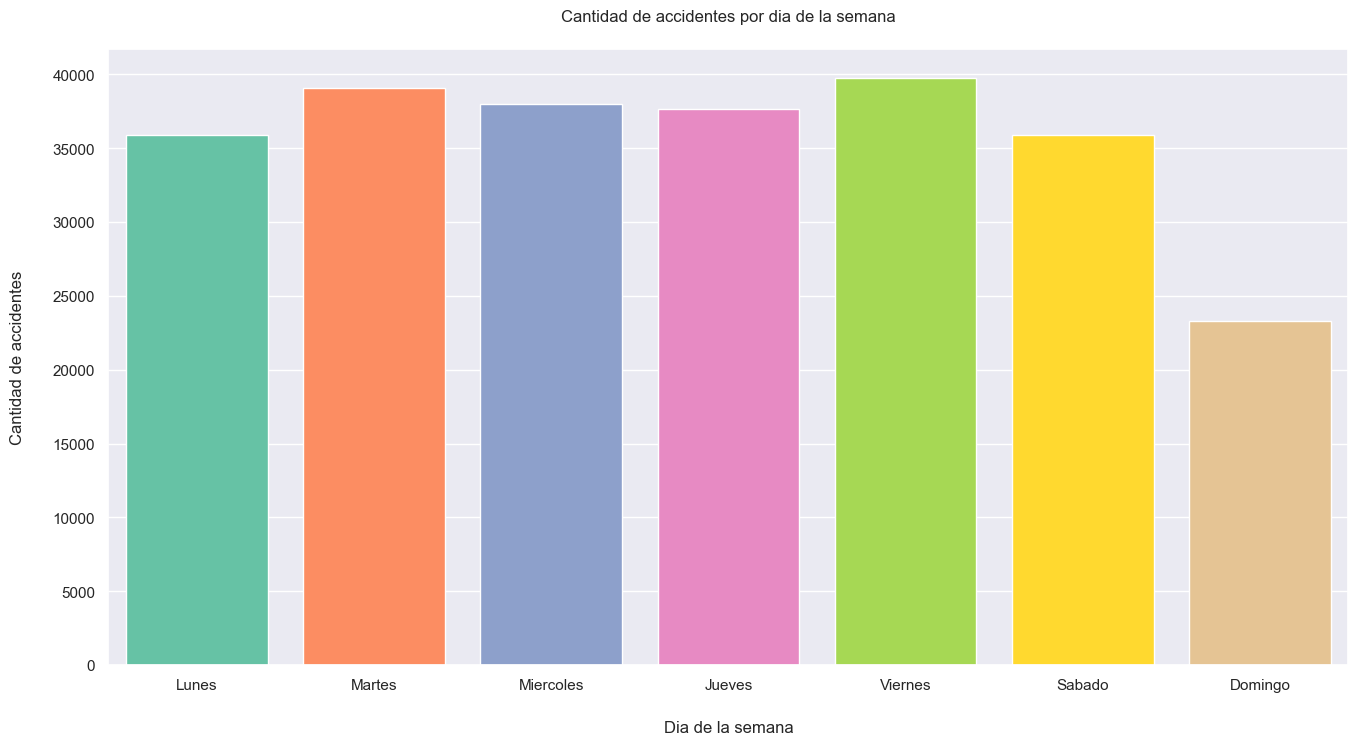

In [240]:
#Cantidad de accidentes por dia de la semana 
fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(data=df, x='DIA_SEMANA', order=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'], saturation=1)
plt.title('Cantidad de accidentes por dia de la semana', pad=20)
plt.xlabel('Dia de la semana', labelpad=20)
plt.ylabel('Cantidad de accidentes', labelpad=20)
plt.show()

## 2.2 Accidentes por mes

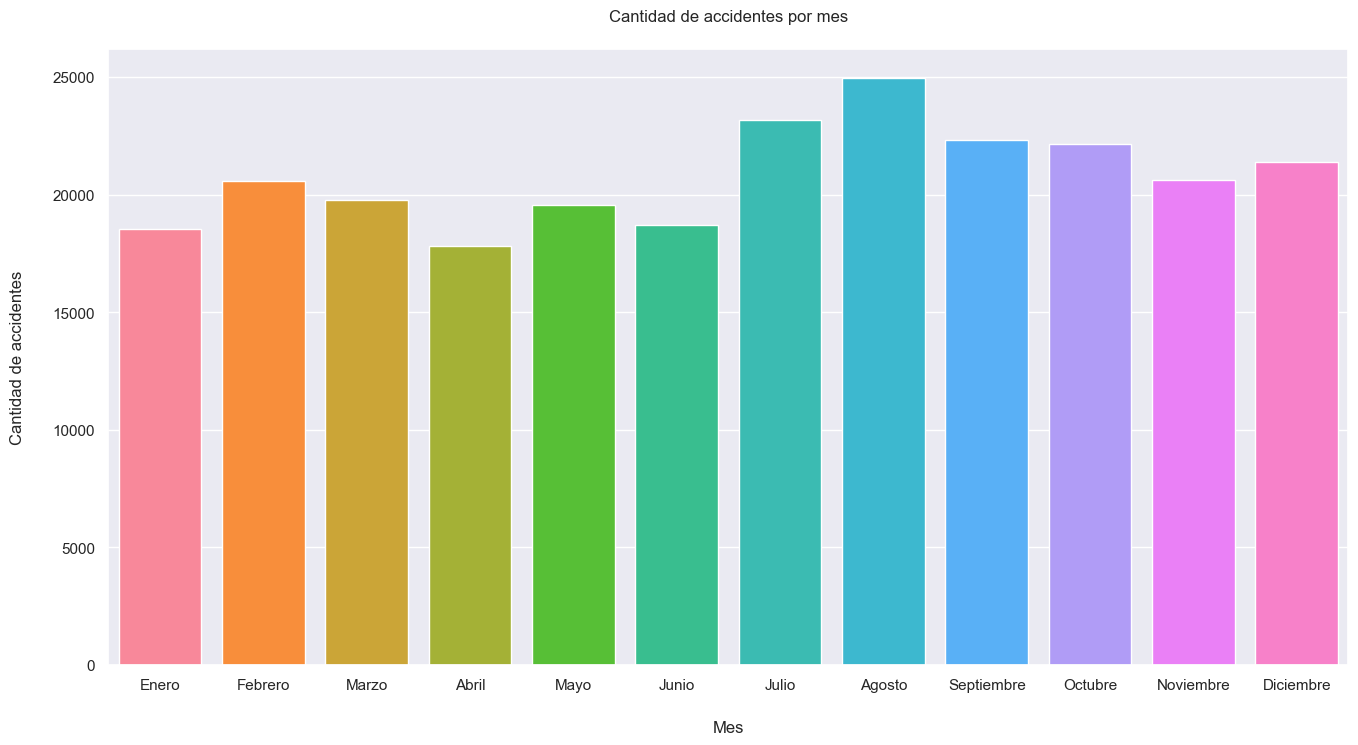

In [241]:
#Cantidad de accidentes por mes
fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.countplot(data=df, x='MES', saturation=1)
plt.title('Cantidad de accidentes por mes', pad=20)
plt.xlabel('Mes', labelpad=20)
plt.ylabel('Cantidad de accidentes', labelpad=20)
_ = ax.set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio','Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.show()

## 2.3 Accidentes por año

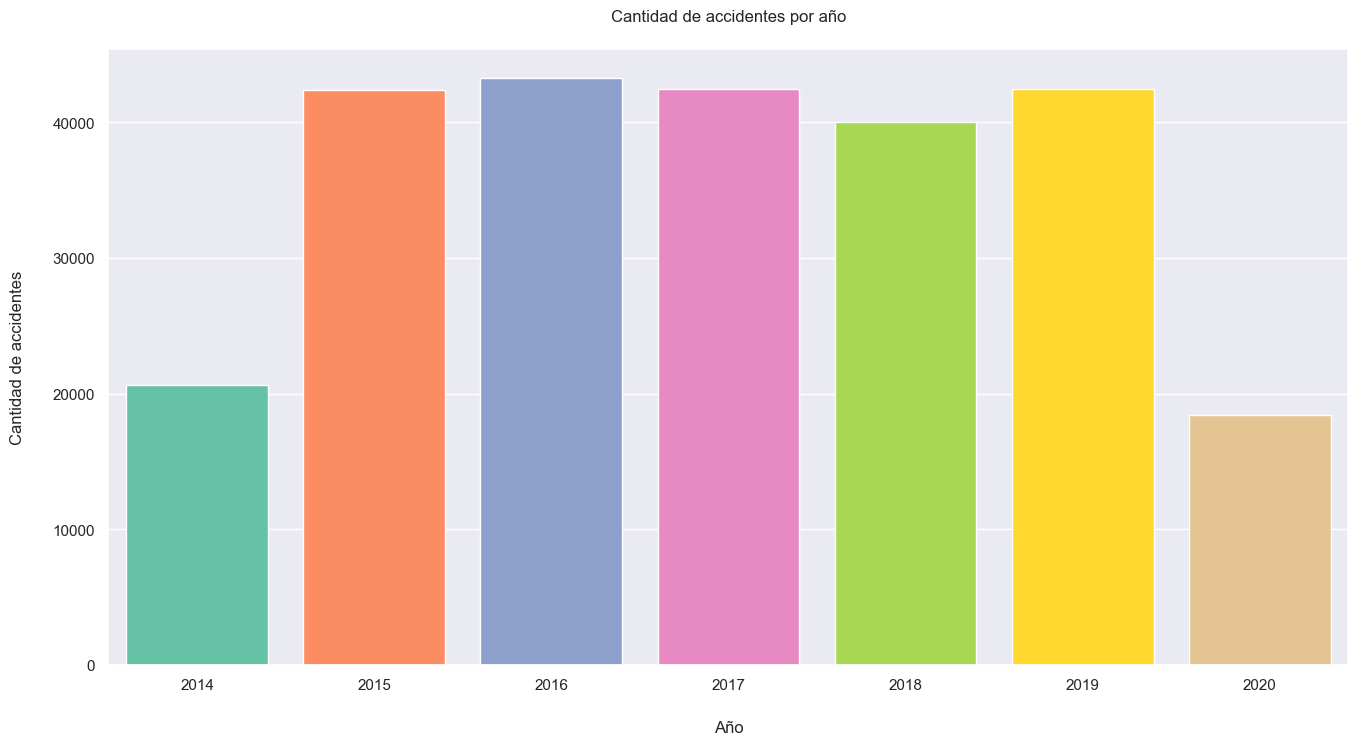

In [242]:
#Cantidad de accidentes por año
fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(data=df, x='AÑO', saturation=1)
plt.title('Cantidad de accidentes por año', pad=20)
plt.xlabel('Año', labelpad=20)
plt.ylabel('Cantidad de accidentes', labelpad=20)
plt.show()

## 2.4 Accidentes por comuna

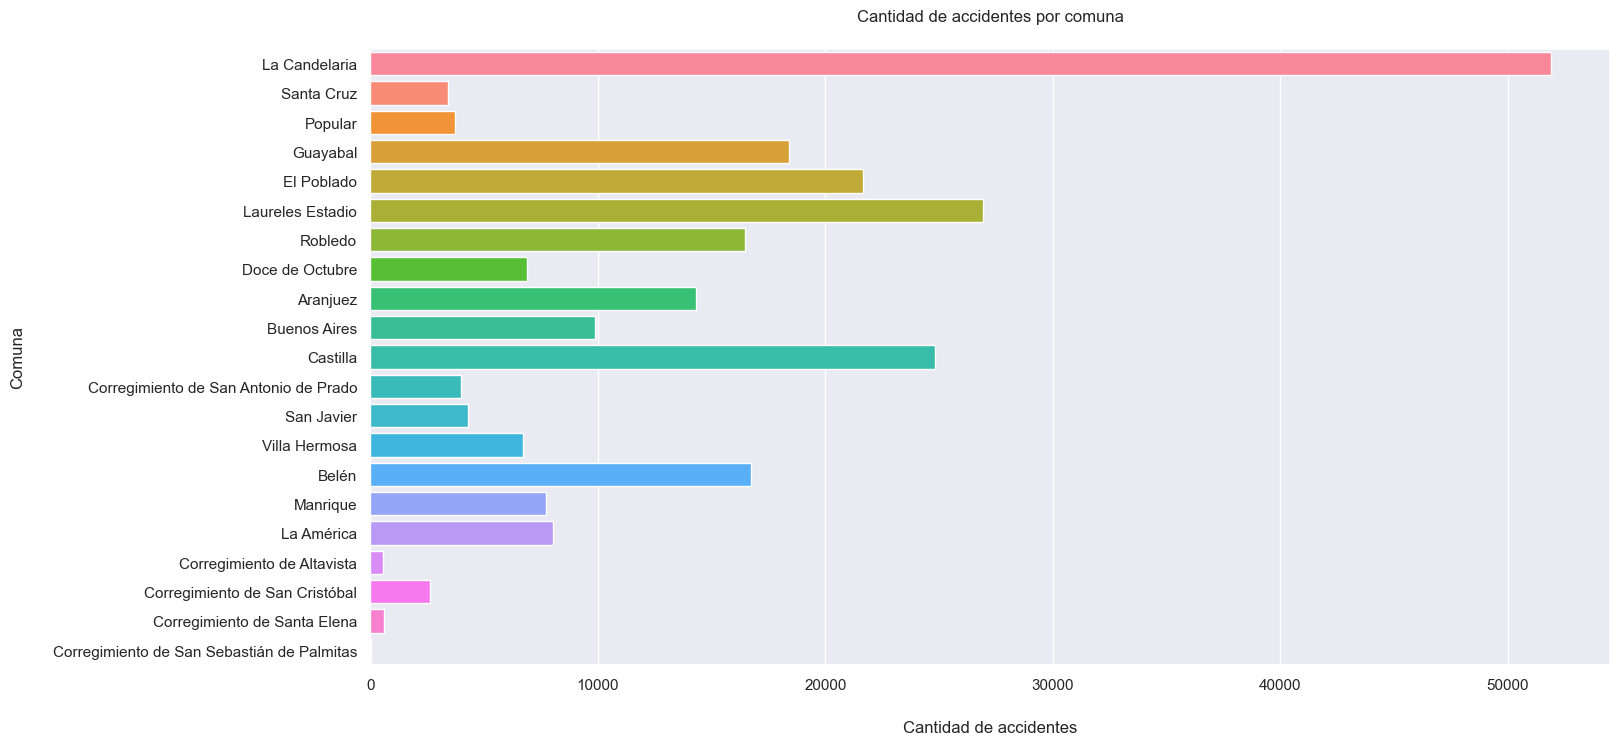

In [243]:
#Cantidad de accidentes por comuna
fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(data=df, y='COMUNA', saturation=1)
plt.title('Cantidad de accidentes por comuna', pad=20)
plt.xlabel('Cantidad de accidentes', labelpad=20)
plt.ylabel('Comuna', labelpad=20)
plt.show()

## 2.5 Accidentes por clase

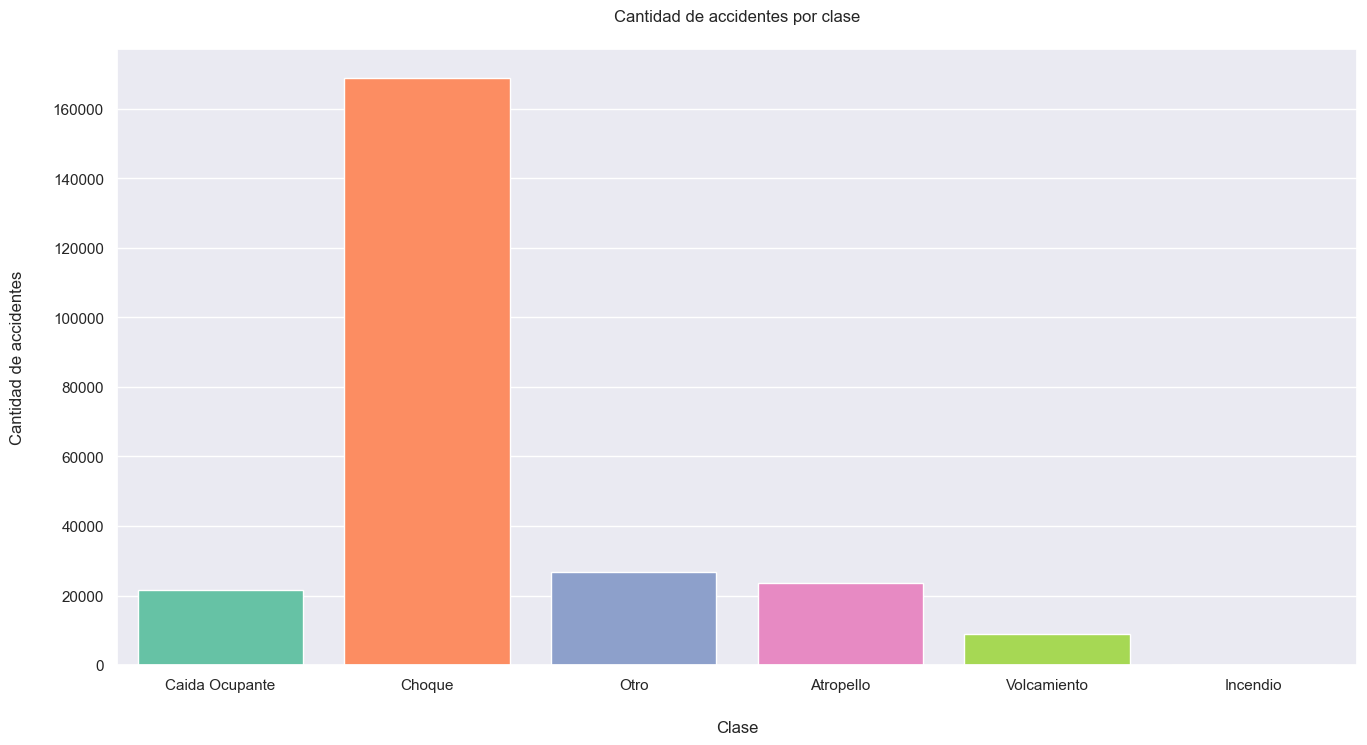

In [244]:
#Cantidad de accidentes por clase
fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(data=df, x='CLASE_ACCIDENTE', saturation=1)
plt.title('Cantidad de accidentes por clase', pad=20)
plt.xlabel('Clase', labelpad=20)
plt.ylabel('Cantidad de accidentes', labelpad=20)
plt.show()

## 2.6 Accidentes por gravedad

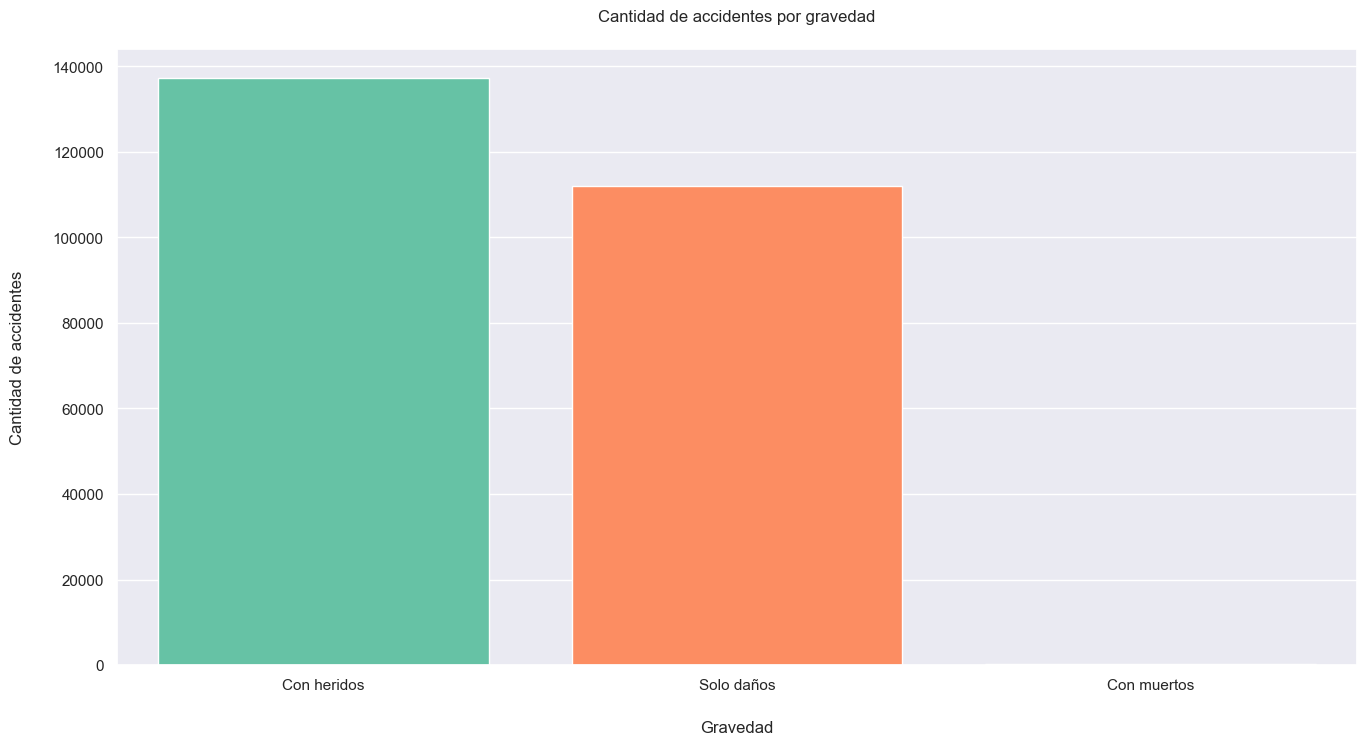

In [245]:
#Cantidad de accidentes por gravedad
fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(data=df, x='GRAVEDAD_ACCIDENTE', saturation=1)
plt.title('Cantidad de accidentes por gravedad', pad=20)
plt.xlabel('Gravedad', labelpad=20)
plt.ylabel('Cantidad de accidentes', labelpad=20)
plt.show()

<center>

# 3. Agrupamiento
</center>

### 3.1 Agrupacion por numero de accidentes en comunas

In [314]:
#agrupacion de la cantidad de accidentes por comuna
accidentes_comuna = pd.crosstab(df['COMUNA'], 'conteo').reset_index()
accidentes_comuna.rename_axis(None, axis=1, inplace=True)
accidentes_comuna.sort_values(by='conteo', ascending=False, inplace=True)
accidentes_comuna.reset_index(drop=True, inplace=True)

In [316]:
#Verificar la agrupacion creada
accidentes_comuna.head()

,COMUNA,conteo
0,La Candelaria,51914
1,Laureles Estadio,26936
2,Castilla,24796
3,El Poblado,21662
4,Guayabal,18419


### 3.2 Agrupacion por numero de accidentes en barrios

In [298]:
import pandas as pd

# Crear un DataFrame de ejemplo con índices multinivel y nombre en el nivel superior
data = {'valor': [10, 20, 30, 40]}
index = pd.MultiIndex.from_arrays([['A', 'B', 'C', 'D'], [1, 2, 3, 4]],
                                  names=['COMUNA', 'conteo'])
dfa = pd.DataFrame(data, index=index)

# Mostrar el DataFrame antes de quitar el nombre del índice
print("DataFrame original:")
print(dfa)

# Quitar el nombre del índice en el nivel superior
dfa = dfa.rename_axis(index={0: None})

# Mostrar el DataFrame después de quitar el nombre del índice
print("\nDataFrame después de quitar el nombre del índice:")
print(dfa)

DataFrame original:
               valor
COMUNA conteo       
A      1          10
B      2          20
C      3          30
D      4          40

DataFrame después de quitar el nombre del índice:
               valor
COMUNA conteo       
A      1          10
B      2          20
C      3          30
D      4          40


In [251]:
df.head()

,AÑO,CLASE_ACCIDENTE,DIRECCION,DISEÑO,GRAVEDAD_ACCIDENTE,MES,BARRIO,COMUNA,FECHA,SEMANA,DIA_SEMANA,HORA,LATITUD,LONGITUD,FECHA_FESTIVA
0,2015,Caida Ocupante,CR 46 CL 43,Tramo de via,Con heridos,10,Barrio Colón,La Candelaria,21/10/2015,42,Miercoles,05:58:00,6.243123,-75.568801,Fecha Normal
1,2015,Choque,CR 43 A CL 29,Tramo de via,Solo daños,11,San Diego,La Candelaria,05/11/2015,44,Jueves,03:00:00,6.228700,-75.569388,Fecha Normal
2,2015,Otro,CR 46 CL 37,Tramo de via,Con heridos,10,La Francia,Santa Cruz,21/10/2015,42,Miercoles,07:40:00,6.298695,-75.550391,Fecha Normal
3,2015,Atropello,CR 34 CL 112,Tramo de via,Con heridos,10,Santo Domingo Savio No. 1,Popular,21/10/2015,42,Miercoles,12:00:00,6.300194,-75.544220,Fecha Normal
4,2015,Choque,CR 50 CL 14,Tramo de via,Solo daños,11,Santa Fé,Guayabal,03/11/2015,44,Martes,06:16:00,6.216992,-75.578181,Fecha Normal
